In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import correlate, correlation_lags, butter, filtfilt, find_peaks



Text(0, 0.5, 'Amplitude')

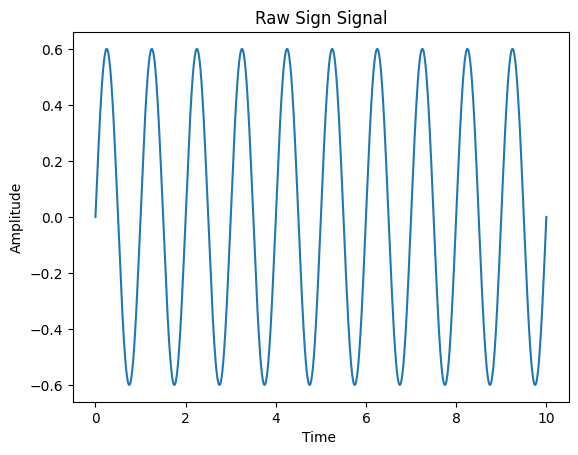

In [37]:
fs = 100
t = np.linspace(0, 10, fs*10)
sin_signal =0.6*np.sin(2*np.pi*1*t)
plt.plot(t, sin_signal)
plt.title("Raw Sign Signal")
plt.xlabel("Time ")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

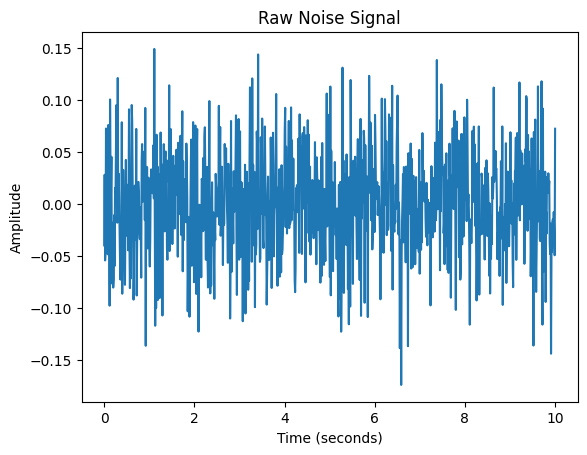

In [41]:
noise_signal = np.random.normal(0,0.05, len(t))

plt.plot(t, noise_signal)
plt.title("Raw Noise Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

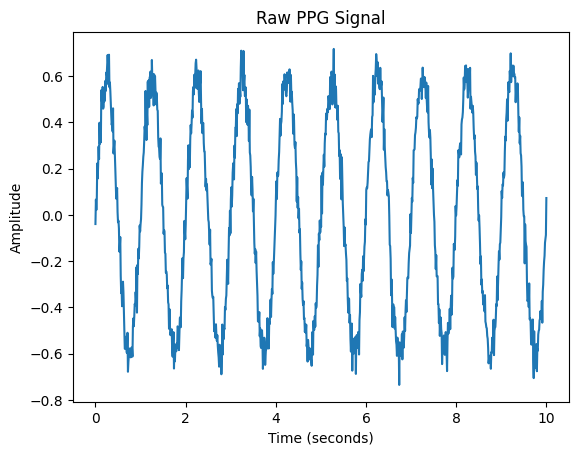

In [42]:
ppg_signal = sin_signal + noise_signal
plt.plot(t, ppg_signal)
plt.title("Raw PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

In [45]:
# BandPass filter function 

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5*fs 
    low = lowcut/nyquist
    high = highcut/nyquist 
    b, a = butter(order, [low,high], btype='band')
    return filtfilt(b, a, signal)

Text(0, 0.5, 'Amplitude')

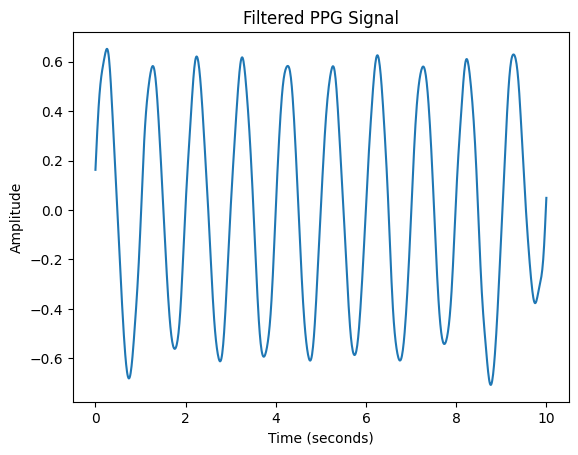

In [46]:
filtered_ppg = bandpass_filter(ppg_signal, 0.5,5,fs)
plt.plot(t, filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Normalized Amplitude')

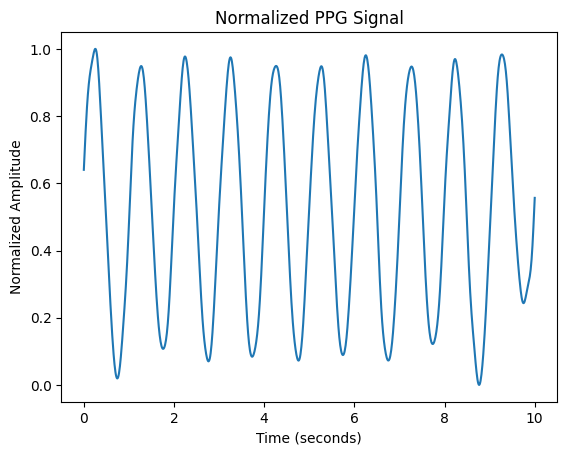

In [48]:
normalized_ppg = (filtered_ppg - np.min(filtered_ppg)) / (np.max(filtered_ppg)- np.min(filtered_ppg))
plt.plot(t, normalized_ppg)
plt.title("Normalized PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")

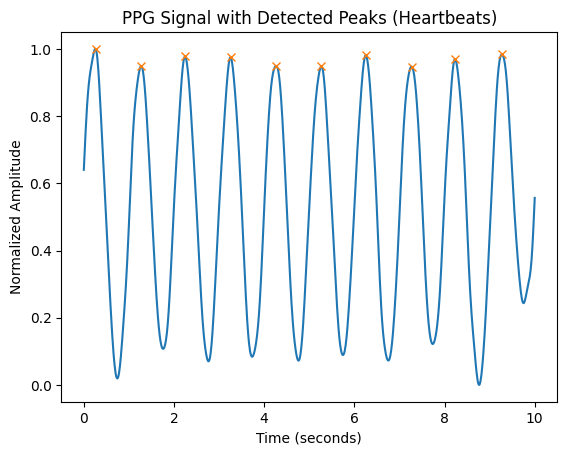

Heart Rate :  60.03086675307764 BPM


In [53]:
peaks, _ = find_peaks(normalized_ppg, distance = fs * 0.6)
ibi = np.diff(peaks) / fs 
heart_rate = 60 / ibi

plt.plot(t, normalized_ppg)
plt.plot(t[peaks], normalized_ppg[peaks], "x", label="peaks")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()
print("Heart Rate : ", np.mean(heart_rate), "BPM")